<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   23.10.2023
* Student: Max Hammer
* Immatriculation ID: 11153562

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)

In [20]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

In [21]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

In [22]:
anomalies = find_anomalies(data)

lower limit= -39.96482266
upper limit= 80.11636225


## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set! 
For sure, the above conclusion is true if and only if the data is normally distributed!


In [23]:
print(anomalies)

[80.61714224744061, 99.17205408075927, 86.4215751234073, -41.0752876085261, -43.06714900382097, -40.32063970418597, 88.65326863591119, -41.28282712210201, 94.80497807409178, 82.70094680175814, 84.76686393504752, -45.06068469953237, 82.64059456281011, 80.25509136474466, -43.81232693648161, -45.21230191553079, 88.08604551497943, 82.369591815651, 85.9708104656157, 82.97968050439259, -45.8971681339703, -41.11266480828613, 100.53698089094755, -44.38264211247683, 82.23783662033449, 92.26554014166295, 87.96231313004853, 91.21746641411097, -53.128801985095905, -45.641575926212354, 91.21225295344836, -43.46923274683489, 82.13498657145581, 82.90737927394908, -46.216851244091984, -41.9565310384887, -45.6065519410858, 80.5243698860871, -43.30420249353775, -42.25263324372853, 81.59215546151304, 103.36235355910189, 96.68762041821407, -40.586879558462776, -48.71851620008829, -45.18412137279293, 81.54158108441533, 84.5587224070789, -40.7688517191754, -44.08128900692253, -42.043297873881315, 87.7143031

# Exercise Solution
Datasets that will be used are:
* [Iris](https://www.kaggle.com/uciml/iris)
* [Wine](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* [Company profits](https://www.kaggle.com/datasets/tinasoni/normal-distribution-data)

In [24]:
# Load data
wine_data = pd.read_csv("./data/wine/winequality-red.csv", sep=",") # normally-distributed 
iris_data = pd.read_csv("./data/iris/Iris.csv", sep=",") # non-normally distributed
profit_data = pd.read_csv("./data/company_profits/CompanyABCProfit.csv", sep=",") # normally-distributed

def plot_anomalies(data, title):
    # Find anomalies
    anomalies = find_anomalies(data)

    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))

    print("Anomalies in data:", anomalies)

    # Plot histogram and color everything outside 3 standard deviations
    plt.hist(data, bins=50, color='grey')
    plt.title(title)
    plt.axvspan(min(data), lower_limit, facecolor='green', alpha=0.5)
    plt.axvspan(upper_limit, max(data), facecolor='green', alpha=0.5)
    
    plt.show()

lower limit= 2.84809865
upper limit= 3.77412774
lower limit= 2.84809865
upper limit= 3.77412774
Anomalies in data: [3.9, 3.85, 2.74, 3.9, 3.78, 3.78, 4.01, 4.01]


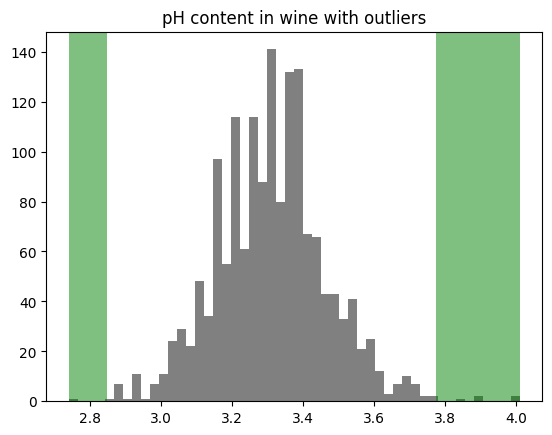

In [25]:
# Wine data

# We are going to selec the "pH" column for further analysis
pH = wine_data['pH']

# Looking at the histogram, it seems like the data is not normally distributed
plot_anomalies(pH, 'pH content in wine with outliers')

lower limit= 1.75756026
upper limit= 4.35043974
lower limit= 1.75756026
upper limit= 4.35043974
Anomalies in data: [4.4]


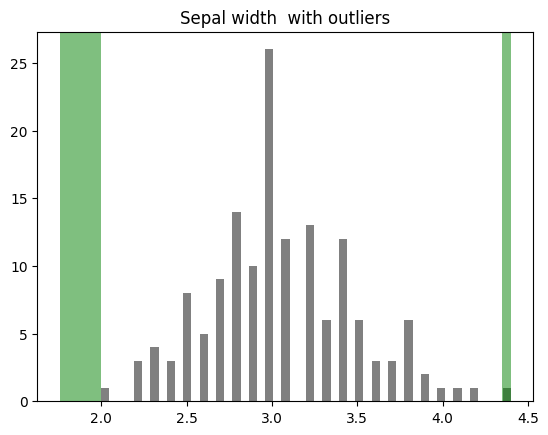

In [26]:
# Iris data

# We are going to selec the "PetalLengthCm" column for further analysis
petal_length = iris_data['SepalWidthCm']

# Looking at the histogram, it seems like the data is not normally distributed
plot_anomalies(petal_length, 'Sepal width  with outliers')

lower limit= -438.21262604
upper limit= 2482.19262604
lower limit= -438.21262604
upper limit= 2482.19262604
Anomalies in data: []


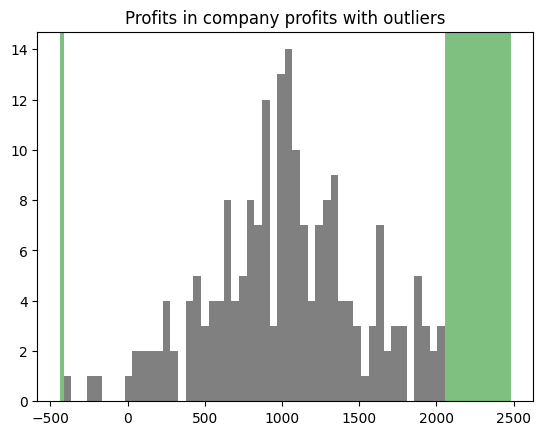

In [27]:
# Company profit data

# We are going to selec the "PetalLengthCm" column for further analysis
profits = profit_data["Profit"]

# Looking at the histogram, it seems like the data is not normally distributed
plot_anomalies(profits, 'Profits in company profits with outliers')

### Answers
**Does the 0,3% rule apply?**
* Wine data: The rule applies and there are anomalies found out of the 3*std range.

* Iris data: The rule does not apply and there are no anomalies found out of the 3*std range due to the data not being normally distributed.

* Company profit data: The rule applies but there are no anomalies found out of the 3*std range.

**What are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection?** 
* The non-normally distributed data set does not have a bell shaped curve and thus the 0,3% rule does not apply.

**Which statement can be made and which cannot?**
* It can be stated that the 0,3% rule applies only to normally distributed data sets.